Introduction:

This dataset contains information about accidents in 12 manufacturing plants across 3 countries given by a Brazilian company, IHM Stefanini. We will use this dataset to understand why accidents occur, and try to discover clues to reduce tragedic accidents.

Columns in this dataset are:
1. Date : timestamp or time/date information
2. Countries : which country the accident occurred (anonymized)
3. Local : the city where the manufacturing plant is located (anonymized)
4. Industry sector : which sector the plant belongs to
5. Accident level : from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
6. Potential Accident Level : Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
7. Genre : if the person is male of female
8. Employee or Third Party : if the injured person is an employee or a third party
9. Critical Risk : some description of the risk involved in the accident
10. Description : Detailed description of how the accident happened

In [2]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS

In [3]:
accidents = pd.read_csv("IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
accidents.head(3)
accidents.shape

(425, 11)

In [4]:
#remove the unnamed column
accidents.drop("Unnamed: 0", axis=1, inplace=True)
accidents.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
accidents.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


In [5]:
# spliting the date into year, month, day, date, weekday..
accidents['Date'] = pd.to_datetime(accidents['Date'])
accidents['Year'] = accidents['Date'].apply(lambda x : x.year)
accidents['Month'] = accidents['Date'].apply(lambda x : x.month)
accidents['Day'] = accidents['Date'].apply(lambda x : x.day)
accidents['Weekday'] = accidents['Date'].apply(lambda x : x.day_name())
accidents['WeekofYear'] = accidents['Date'].apply(lambda x : x.weekofyear)
accidents.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1


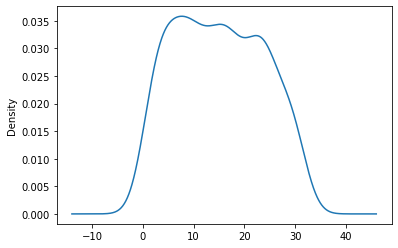

In [6]:
# UNIVARIATE plots

# country wise split of accidents
# sns.countplot('Country',data=accidents); # BAR PLOT for categorical data

# accidents['Industry Sector'].value_counts().plot.bar() # BAR PLOT for categorical data

# plt.pie(accidents['Industry Sector'].value_counts(), autopct='%.2f', labels=['Mining','Metals','Others']) # PIE CHART for categorical data

# sns.distplot(accidents['Day']) # HISTOGRAM for numerical data
# plt.show()

# plt.hist(accidents['WeekofYear']) # HISTOGRAM for numerical data 

accidents['Day'].plot(kind='density') # DENSITY for numerical data

# sns.kdeplot(accidents['Month'],shade=True) # DENSITY with shading for numerical data

# plt.boxplot(accidents['Month']) # BOXPLOT for numerical data only

# plt.violinplot(accidents['Month'], showmedians=True) # VIOLINPLOT for numerical data only

In [7]:
# BIVARIATE ANALYSIS 

# sns.catplot(x="Month", y="Day", data=accidents) # Numbers only - 2 columns
# sns.catplot(x="Month", y="Day", data=accidents, jitter=True)
# sns.catplot(x="Month", y="Day", data=accidents, kind="swarm")

# sns.catplot(x="Day", y="Industry Sector", kind="box", data=accidents) # Numerical and Categorical






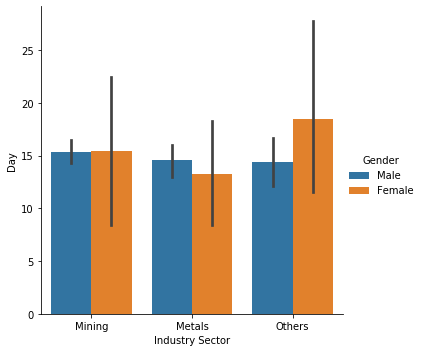

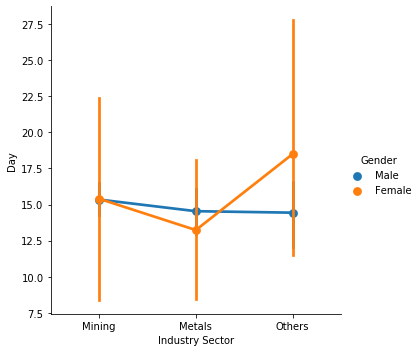

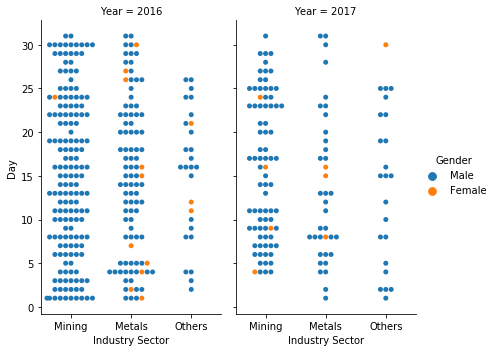

In [8]:
# BIVARIATE with 3 columns
# sns.catplot(x="Month", y="Day", hue="Industry Sector", kind="swarm", data=accidents);

# sns.catplot(x="Day", y="Industry Sector", hue="Gender", kind="box", data=accidents)
# sns.catplot(x="Day", y="Industry Sector", hue="Gender", kind="violin", data=accidents)

sns.catplot(x="Industry Sector", y="Day", hue="Gender", kind="bar", data=accidents)

sns.catplot(x="Industry Sector", y="Day", hue="Gender", kind="point", data=accidents);

sns.catplot(x="Industry Sector", y="Day", hue="Gender",
            col="Year", aspect=.6,
            kind="swarm", data=accidents);